## TensorFlow 2.0 Tutorials for Beginners - How to use Pre-trained VGG16 models to predict object

![alt text](https://qph.fs.quoracdn.net/main-qimg-e657c195fc2696c7d5fc0b1e3682fde6)

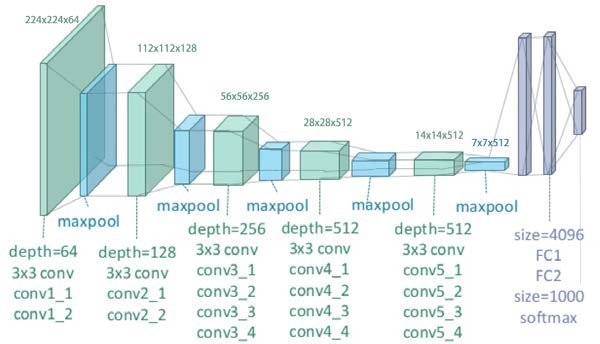

The VGG network architecture was introduced by Simonyan and Zisserman in their 2014 paper, Very Deep Convolutional Networks for Large Scale Image Recognition.

This network is characterized by its simplicity, using only 3×3 convolutional layers stacked on top of each other in increasing depth. Reducing volume size is handled by max pooling. Two fully-connected layers, each with 4,096 nodes are then followed by a softmax classifie

In 2014, 16 and 19 layer networks were considered very deep (although we now have the ResNet architecture which can be successfully trained at depths of 50-200 for ImageNet and over 1,000 for CIFAR-10)

Due to its depth and number of fully-connected nodes, VGG is over 533MB for VGG16 and 574MB for VGG19.

In [13]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

In [14]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [15]:
model = VGG16()

In [16]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [27]:
import os

for file in os.listdir('./dataset/sample'):
    print(file)
    full_path = './dataset/sample/' + file
    
    image = load_img(full_path, target_size=(224,224))
    image = img_to_array(image)
    print(image.shape)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)
    y_pred = model.predict(image)
    label = decode_predictions(y_pred, top = 2) # top=1 perchè vogliamo solo la classe migliore
    print(label)
    print()

Image 2.jpeg
(224, 224, 3)
[[('n04074963', 'remote_control', 0.15702468), ('n03642806', 'laptop', 0.09323158)]]

Image.jpeg
(224, 224, 3)
[[('n03404251', 'fur_coat', 0.17558292), ('n02963159', 'cardigan', 0.11408881)]]

Image 3.jpeg
(224, 224, 3)
[[('n03868863', 'oxygen_mask', 0.7495343), ('n03424325', 'gasmask', 0.044298735)]]

Image 4.jpeg
(224, 224, 3)
[[('n03179701', 'desk', 0.3957972), ('n04033901', 'quill', 0.073861234)]]

